# Finding the minimum of a function

## Local and global minimums

One of the most common problems in numerical analysis is to find the minimum of a multivariate function. To be precise, we are often mostly concerned with finding **a** minimum, not **the** minimum:

- **Global minimum**: a point in the domain of a function such that the function is smaller at that point than anywhere else in the domain:

$$
\bm{x} \text{ is a global minimum of } f(\bm{x})
\Leftrightarrow
\forall \bm{x}' \in \mathbb{R}^{n} \Rightarrow f(\bm{x}') \ge f(\bm{x})
$$

But try to always read Mathematics in more intuitive terms, like if you are trying to explain the concepts to yourself. In this case, it reads: 

<center>
"A point is a global minimum if it is the lowest point of the function, end of story. Of all possible pits in the function, it is the lowest."
</center>

- **Local minima**: points in the domain of a function such that there is a radius (usually really small) around it where the function only goes up. In math notation it looks like this:

$$
\bm{x} = (x_1, x_2, \cdots, x_n) \in \mathbb{R}^{n} \text{ is a local minimum of } f(\bm{x})
\Leftrightarrow
\exists \delta > 0 : \forall \bm{x}' \in \mathbb{R}^{n}, \|\bm{x}' - \bm{x}\| < \delta \Rightarrow f(\bm{x}') \ge f(\bm{x})
$$

And in intuitive terms:

<center>
"A local minimum is the bottom of a pit. The function may have many pits, each bottom is called a local minimum."
</center>

<center>
<img src="./minimum.png" width=30%>
</center>

## Finding a local minimum


There are several ways to look for a local minimum, which can be grouped as:

- Trial and error
- Analytic solutions
- Numerical optimization

### Trial and error

Just try several values of $\bm{x}$ to see which one has the smallest $f(\bm{x})$. No guarantees of finding a local minimum really, let alone it being a global minimum. But this is a real approach: systematic forms of this trial-and-error search exist with different names. For example: genetic search, particle swarm optimization, tabu search, simulated annealing, etc.

Lets do some exercises. (Exercises with no stars are easy. Exercises with $\star$ are not trivial but not too difficult. Exercises with $\star\star$ are harder. Exercises with $\star\star\star$ are cruel.)

**Exercise**: Consider the univariate (*i.e.* $\bm{x} \in \mathbb{R}$ is just a variable, not a list of them) function $f(x) = 2x^2 - 3x + 5$. 

1. Plot the function and find the minimum visually.

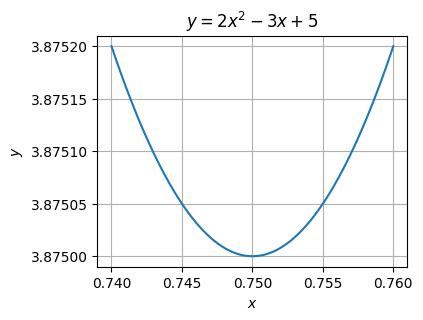

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.74, 0.76, 1001)
y = 2*x**2 - 3*x + 5

plt.figure(figsize=(4, 3))
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$y = 2x^2 - 3x + 5$')
plt.grid()
plt.show()

2. $\star$ Write a program to test $100$ random guesses for $x$ in the interval $[-5, 5]$ and compare with your visual guess for the minimum. Then test $10000$ random guesses and see if the precision increased.

In [2]:
def experiment(num_points):
    x = np.random.uniform(-5, 5, num_points)
    y = 2*x**2 - 3*x + 5

    index_min_y = np.argmin(y)
    x_min = x[index_min_y]

    print(f'The minimum of y is {y[index_min_y]} at x = {x_min}')

num_points = 100
experiment(num_points)

num_points = 10_000
experiment(num_points)

num_points = 100_000
experiment(num_points)

num_points = 1_000_000
experiment(num_points)

num_points = 10_000_000
experiment(num_points)

num_points = 100_000_000
experiment(num_points)

The minimum of y is 3.8762206787028353 at x = 0.7747050470839003
The minimum of y is 3.875001641154248 at x = 0.749094142878719
The minimum of y is 3.875000008219099 at x = 0.7500641057679456
The minimum of y is 3.875000000178486 at x = 0.7500094468572929
The minimum of y is 3.8750000000001443 at x = 0.7500002685928404
The minimum of y is 3.875000000000003 at x = 0.7500000394179605


Looks like every $10 \times$ points we gain only one digit in accuracy... this method is really inefficient!

**Exercise**

The function $f(x, y) = \sin(y) \exp\left((1 - \cos(x))^2\right) + \cos(x) \exp\left((1 - \sin(y))^2\right) + (x - y)^2$ is quite curious, with many local minima, and it's called "Mishra's bird function". Here is a plot of it:

In [3]:
import numpy as np


def mishra_bird(x, y):
    return \
        np.sin(y) * np.exp((1 - np.cos(x))**2) \
        + np.cos(x) * np.exp((1 - np.sin(y))**2) \
        + (x - y)**2

In [4]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

X, Y = np.meshgrid(x, y)

Z = mishra_bird(X, Y)

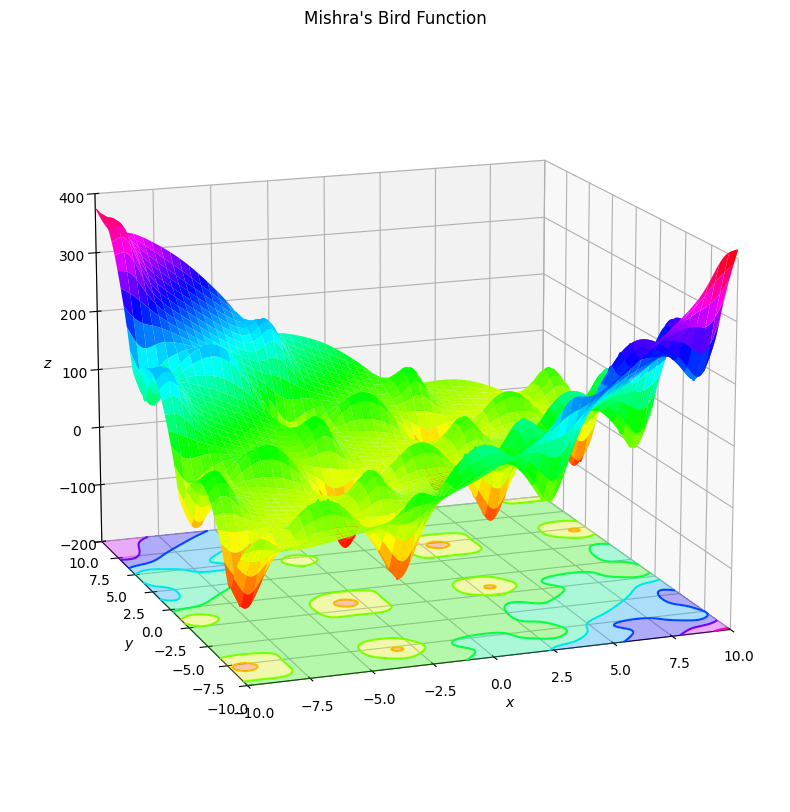

In [5]:
import matplotlib.pyplot as plt

cmap = 'hsv'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cmap)
ax.contourf(X, Y, Z, zdir='z', offset=-200, cmap=cmap, alpha=0.3)
ax.contour(X, Y, Z, zdir='z', offset=-200, cmap=cmap)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Mishra\'s Bird Function')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-200, 400)
ax.view_init(15, 250)
plt.show()


How many local minima do you see in this $(-10, 10)^{2}$ domain?

7 inside the domain

**Exercise**

1. Suppose you have a function $f: [0, 1] \to \mathbb{R}$, that is, a function $f(x)$ of one variable and restricted to the domain $[0, 1]$. You want to find the **global** minimum of the function with precision $0.1$ in $x$, so you build a regular *grid* of points in the interval $[0, 1]$ and test each one. How many points you have to test?

*Solution*: I'd have to test $f(x)$ at the points $[0.1, 0.3, 0.5, 0.7, 0.9]$, so 5 points

2. $\star$ Suppose you have a function $f:[0, 1]^{n} \to \mathbb{R}$, that is, a function $f(\bm{x}_1, \bm{x}_2, \cdots, \bm{x}_n)$ of $n$ variables, all restricted to the domain $[0, 1]$. You want to find the **global** minimum of the function with precision $0.1$ in each variable $\bm{x}_i$ by building a regular grid in the hypercube $[0, 1]^{n}$. How many points you have to test?

*Solution*: $5^{n}$

3. $\star\star$ Although you achieve precision of $0.1$ in each coordinate in the previous exercise, you may still be very, very far from the minimum point! Why is that? Hint:

- Think of a line segment of length $0.1$, and the distance from the midpoint to the endpoints.
- Now think of a square of edge length $0.1$ and the distance from the midpoint to the corners.
- Now consider a cube of edge length $0.1$ and imagine the distance from the midpoint to the corners.
- Then make a formula for the distance of the midpoint to one of the corners in the general case of the hypercube of edge length $0.1$.

*Solution*: The distance between the midpoint and a corner is $\sqrt{\underbrace{0.1^2 + 0.1^2 + \cdots + 0.1^2}_{n \text{ times}}} = 0.1 \sqrt{n}$. Depending on the dimensionality $n$ this value can be really big. For example, if $n = 100$ (quite common in *machine learning*) we have an internal distance $0.1 \sqrt{100} = 1.0$, ten times the precision!

4. $\star\star\star$ The volume of a hypercube is computed the same way as the area of a square or the volume of a regular cube, it is just the edge length raised to the power of the dimension. Consider a hypercube of dimension $n$ and edge length one. How much of the volume of the hypercube is within a distance $\delta < 0.05$ from the walls?

*Solution*: The unit hypercube volume is $1.0$. The internal cube volume is $0.9^n$. Therefore, the volume close to the walls is $1.0 - 0.9^n$. Lets study the behaviour of this function:

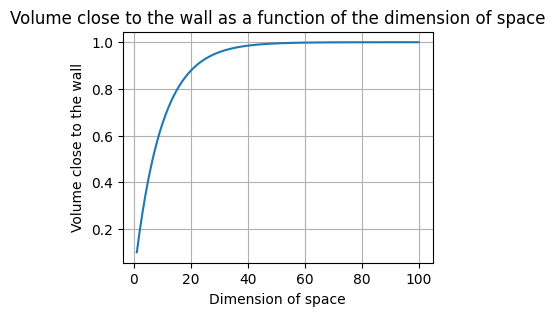

In [6]:
n = np.arange(1, 101)
V_wall = 1 - 0.9**n

plt.figure(figsize=(4, 3))
plt.plot(n, V_wall)
plt.xlabel('Dimension of space')
plt.ylabel('Volume close to the wall')
plt.title('Volume close to the wall as a function of the dimension of space')
plt.grid()
plt.show()


So it looks like for dimensions greater than $40$ almost all volume is at the walls!

From the previous exercises it looks like high dimensionality has many particularities, which makes the search for minima very hard:

- The number of points required to cover the entire space grows exponentially with the dimensionality of problem.
- The distance between points increases with the square-root of the dimensionality even if the difference in coordinates stays small.
- Most of the points exist in the limits of the space, even if the coordinates are uniformly distributed.

A consequence of this is that **optimization methods that work for small dimensionality may not necessarily work in higher dimensions!**

$\star\star\star$ **Exercise** The Mishra's bird function above does not change too fast apparently. Maybe we can find the global minimum with good precision using a smart approach: look for the global minimum in a grid of resolution $0.1$, then build a finer grid only around the candidate for global minimum. Find the minimum of the Mishra's bird function in the domain $[-10, 10]$ with resolution $0.001$.

In [7]:
def mishra_minimum(x_low, x_high, y_low, y_high, res):
    x = np.arange(x_low, x_high, res)
    y = np.arange(y_low, y_high, res)

    X, Y = np.meshgrid(x, y)

    Z = mishra_bird(X, Y)

    idx = np.argmin(Z)

    x_min = X.flatten()[idx]
    y_min = Y.flatten()[idx]
    z_min = Z.flatten()[idx]

    return x_min, y_min, z_min

In [8]:
# Round 1: find a neighborhood of the minimum with resolution 0.1.
x_low = -10
x_high = 10
y_low = -10
y_high = 10
res = 0.1

x_min, y_min, z_min = mishra_minimum(x_low, x_high, y_low, y_high, res)

print(f'The minimum of the Mishra\'s Bird function with resolution {res} is {z_min} at x = {x_min}, y = {y_min}')

The minimum of the Mishra's Bird function with resolution 0.1 is -106.59441880296542 at x = -3.1000000000000245, y = -1.6000000000000298


In [9]:
# Round 2: find a neighborhood of the minimum with resolution 0.01.
x_low = x_min - res
x_high = x_min + res
y_low = y_min - res
y_high = y_min + res
res = 0.01

x_min, y_min, z_min = mishra_minimum(x_low, x_high, y_low, y_high, res)

print(f'The minimum of the Mishra\'s Bird function with resolution {res} is {z_min} at x = {x_min}, y = {y_min}')

The minimum of the Mishra's Bird function with resolution 0.01 is -106.76389893908477 at x = -3.130000000000026, y = -1.5800000000000298


In [10]:
# Round 2: find a neighborhood of the minimum with resolution 0.01.
x_low = x_min - res
x_high = x_min + res
y_low = y_min - res
y_high = y_min + res
res = 0.001

x_min, y_min, z_min = mishra_minimum(x_low, x_high, y_low, y_high, res)

print(f'The minimum of the Mishra\'s Bird function with resolution {res} is {z_min} at x = {x_min}, y = {y_min}')

The minimum of the Mishra's Bird function with resolution 0.001 is -106.76452567260424 at x = -3.130000000000027, y = -1.5820000000000307


### Deriving the value of the minimum using calculus

If the formula for $f(\bm{x})$ is known, and simple enough, one could try to find analytically the minima of it.

First, take the partial derivative of $f(\bm{x})$ with respect to each component of $\bm{x}$. The tuple of all partial derivatives is the *gradient* of $f(\bm{x})$:

$$
\nabla f(\bm{x}) = 
\begin{bmatrix}
\frac{\partial f}{\partial x_{1}}(\bm{x}) \\[10pt]
\frac{\partial f}{\partial x_{2}}(\bm{x}) \\[10pt]
\vdots \\[10pt]
\frac{\partial f}{\partial x_{n}}(\bm{x})
\end{bmatrix}
$$

Then set the gradient to the null vector $\overrightarrow{\bm{0}}$ and solve for $\bm{x}$:

$$
\nabla f(\bm{x}) = \overrightarrow{\bm{0}} 
\Leftrightarrow \left\{
\begin{matrix}
\frac{\partial f}{\partial x_{1}}(\bm{x}) = 0 \\[10pt]
\frac{\partial f}{\partial x_{2}}(\bm{x}) = 0 \\[10pt]
\vdots \\[10pt]
\frac{\partial f}{\partial x_{n}}(\bm{x}) = 0
\end{matrix}
\right.
$$

Solutions (yes, there may be more than one) to this system of equations will give you the "critical points" or "stationary points". It could be a minimum point, a maximum point, or "saddle point". In order to decide the nature of the solution, you need to consult the second derivative of $f(\bm{x})$. For a multivariate function, the first derivative is a vector (the gradient) and the second derivative is a *matrix*, called the *Hessian* matrix:

$$
\bm{H}_{f}(\bm{x}) = 
\begin{bmatrix}
\frac{\partial^{2} f}{\partial x_{1}^{2}}(\bm{x}) &
\frac{\partial^{2} f}{\partial x_{1} \partial x_{2}}(\bm{x}) &
\cdots &
\frac{\partial^{2} f}{\partial x_{1} \partial x_{n}}(\bm{x})\\[10pt]
\frac{\partial^{2} f}{\partial x_{2} \partial x_{1}}(\bm{x}) &
\frac{\partial^{2} f}{\partial x_{2}^{2}}(\bm{x}) &
\cdots &
\frac{\partial^{2} f}{\partial x_{2} \partial x_{n}}(\bm{x})\\[10pt]
\vdots & \vdots & \ddots & \vdots\\[10pt]
\frac{\partial^{2} f}{\partial x_{n} \partial x_{1}}(\bm{x}) &
\frac{\partial^{2} f}{\partial x_{n} \partial x_{2}}(\bm{x}) &
\cdots &
\frac{\partial^{2} f}{\partial x_{n}^{2}}(\bm{x})
\end{bmatrix}
$$

Note that the Hessian matrix is symmetric, because 
$\frac{\partial^{2} f}{\partial x_{i} \partial x_{j}}(\bm{x}) = 
\frac{\partial^{2} f}{\partial x_{j} \partial x_{i}}(\bm{x})$ (Clairaut's theorem).

Now take each one of your critical points $\bm{x}_{c}$ and compute the Hessian on it. And compute the eigenvalues $\lambda_{i}$, $i \in \{1, 2, \cdots, n\}$ of the Hessian $\bm{H}_{f}(\bm{x}_c)$. And finally check:

- If all eigenvalues are positive, $\bm{x}_{c}$ is a minimum.
- If all eigenvalues are negative, $\bm{x}_{c}$ is a maximum.
- If some eigenvalues are zero, and out of the remaining some are positive and some negative, then $\bm{x}_{c}$ is a saddle point.

This is all very complicated! But if this is useful, we must take a deep breath and face it...

So here is how the analytic derivative method relates to machine learning:

- Very few machine learning methods use the analytic derivative to find the optimal parameters of the model. The only one of which I'm aware is the *linear regression*.

- Some methods use the analytically derived gradient but do not solve the system of equations to find the minima analytically. Instead, they use an iterative method to start from a random estimate for the minimum (a point chosen at random) and update this estimate successively using the gradient: change the estimate by adding a fraction of the *negative* of the gradient to it, repeat until convergence. This is the *gradient descent* method, to be discussed in the next section.

- There is a way to obtain the numerical value of the gradient without having to determine the *formula* for the gradient, using a technique called ***automatic differentiation*** (or *autograd* for short). *This is the heart of ALL deep learning*, and there are several libraries to perform *autograd* efficiently and using advanced hardware, like GPUs or TPUs. For example: Tensorflow, Pytorch, Jax. The numerical gradient is then used with the *gradient descent* method to find a local minimum of the *loss function* (more on that later) with respect to the tunable parameters of the model.

### Numerical optimization

There are several methods for finding the numerical minimum of a function. One could have multiple courses on this topic, it is huge! Here is a book on it: Nocedal, J., & Wright, S. (n.d.). Numerical optimization (Second edition.). Springer-Verlag. 2006.

So lets focus on the most useful method for numerical optimization in machine learning: the *gradient descent* method. The idea is simple: start at a point at random, and go walking in the direction of strongest decrease of the function until you reach the (local) minimum.

In [59]:
def gradient_descent(f, g, x0, eta, tol):
    '''
    f: function to minimize
    g: gradient of f
    x0: initial guess
    eta: learning rate
    tol: tolerance for stopping criterion
    '''
    x = x0
    all_x = [x]
    print(f'Initial guess: {x}')
    while True:
        grad = g(x)
        x = x - eta * np.array(grad)
        all_x.append(x)
        print(f'Current guess: {x}')
        if np.linalg.norm(grad) < tol:
            break
    return x, all_x

Lets try this to find the minimum of $f(x) = 2x^2 - 3x + 5$:

In [32]:
def f(x):
    return 2.0*x**2 - 3.0*x + 5.0

def grad_f(x):
    return 4.0*x - 3.0

In [33]:
# A random number between -10 and 10.
x_0 = -10.0 + 20.0 * np.random.rand()

eta = 0.1

tol = 1e-6

In [60]:
x_min, _ = gradient_descent(f, grad_f, x_0, eta, tol)

Initial guess: [0.1 0. ]
Current guess: [0.36 0.3 ]
Current guess: [0.516 0.48 ]
Current guess: [0.6096 0.588 ]
Current guess: [0.66576 0.6528 ]
Current guess: [0.699456 0.69168 ]
Current guess: [0.7196736 0.715008 ]
Current guess: [0.73180416 0.7290048 ]
Current guess: [0.7390825  0.73740288]
Current guess: [0.7434495  0.74244173]
Current guess: [0.7460697  0.74546504]
Current guess: [0.74764182 0.74727902]
Current guess: [0.74858509 0.74836741]
Current guess: [0.74915105 0.74902045]
Current guess: [0.74949063 0.74941227]
Current guess: [0.74969438 0.74964736]
Current guess: [0.74981663 0.74978842]
Current guess: [0.74988998 0.74987305]
Current guess: [0.74993399 0.74992383]
Current guess: [0.74996039 0.7499543 ]
Current guess: [0.74997623 0.74997258]
Current guess: [0.74998574 0.74998355]
Current guess: [0.74999144 0.74999013]
Current guess: [0.74999487 0.74999408]
Current guess: [0.74999692 0.74999645]
Current guess: [0.74999815 0.74999787]
Current guess: [0.74999889 0.74999872]
Cur

In [61]:
x_min

array([0.74999991, 0.7499999 ])

**Exercise** Find a local minima of the mishra function starting from:

- $\bm{x}_{0} = (-3.0, -2.0)$
- $\bm{x}_{0} = (2.5, 5.0)$
- $\bm{x}_{0} = (-10.0, 10.0)$
- $\bm{x}_{0} = (10.0, -10.0)$

In [36]:
def mishra_bird_grad(x, y):
    dfdx = \
        2.0 * (x - y) \
        - np.sin(x) * (\
            np.exp((1.0 - np.sin(y))**2) \
            - 2.0 * np.exp((-1.0 + np.cos(x))**2) * (1 - np.cos(x)) * np.sin(y) \
        )
    dfdy = \
        np.cos(y) \
            * (np.exp((1.0 - np.cos(x))**2) - 2.0 * np.cos(x) * np.exp((np.sin(y) - 1.0)**2) * (1 - np.sin(y))) \
        - 2.0 *(x - y)
    return dfdx, dfdy

In [62]:
def find_mishra_minimum(x_0):
    eta = 1e-3
    tol = 1e-6
    return gradient_descent(
        lambda x: mishra_bird(x[0], x[1]),
        lambda x: mishra_bird_grad(x[0], x[1]),
        x_0,
        eta,
        tol,
    )

In [63]:
x_0 = np.array([-3.1, -1.5])
x_min = find_mishra_minimum(x_0)
print(x_min)

Initial guess: [-3.1 -1.5]
Current guess: [-3.10807059 -1.52231097]
Current guess: [-3.11401293 -1.53864569]
Current guess: [-3.11837374 -1.5505501 ]
Current guess: [-3.12156785 -1.55920595]
Current guess: [-3.12390482 -1.56549289]
Current guess: [-3.12561353 -1.57005706]
Current guess: [-3.12686238 -1.57336994]
Current guess: [-3.12777489 -1.57577449]
Current guess: [-3.12844152 -1.57751977]
Current guess: [-3.12892846 -1.57878659]
Current guess: [-3.12928412 -1.57970616]
Current guess: [-3.12954386 -1.58037369]
Current guess: [-3.12973355 -1.58085827]
Current guess: [-3.12987207 -1.58121006]
Current guess: [-3.12997321 -1.58146545]
Current guess: [-3.13004707 -1.58165086]
Current guess: [-3.13010099 -1.58178547]
Current guess: [-3.13014036 -1.58188319]
Current guess: [-3.1301691  -1.58195415]
Current guess: [-3.13019009 -1.58200566]
Current guess: [-3.1302054  -1.58204306]
Current guess: [-3.13021659 -1.58207021]
Current guess: [-3.13022475 -1.58208993]
Current guess: [-3.13023071 -1

In [64]:
x_0 = np.array([2.5, 5.0])
x_min = find_mishra_minimum(x_0)
print(x_min)

Initial guess: [2.5 5. ]
Current guess: [2.58577554 4.94641154]
Current guess: [2.67441539 4.89651895]
Current guess: [2.7621484  4.85239353]
Current guess: [2.84419631 4.81536029]
Current guess: [2.91613707 4.78574253]
Current guess: [2.97542503 4.76297196]
Current guess: [3.02189897 4.74595614]
Current guess: [3.05709038 4.73346869]
Current guess: [3.0831825 4.7243991]
Current guess: [3.10230204 4.71784787]
Current guess: [3.11622635 4.71312848]
Current guess: [3.12633616 4.7097329 ]
Current guess: [3.13366591 4.70729105]
Current guess: [3.13897677 4.70553534]
Current guess: [3.14282397 4.70427302]
Current guess: [3.14561075 4.70336542]
Current guess: [3.14762946 4.70271283]
Current guess: [3.14909188 4.7022436 ]
Current guess: [3.15015136 4.70190621]
Current guess: [3.15091896 4.70166361]
Current guess: [3.15147512 4.70148918]
Current guess: [3.1518781  4.70136377]
Current guess: [3.1521701  4.70127361]
Current guess: [3.15238168 4.70120878]
Current guess: [3.152535   4.70116219]
Cu

In [65]:
x_0 = np.array([-10.0, 10.0])
x_min = find_mishra_minimum(x_0)
print(x_min)

Initial guess: [-10.  10.]
Current guess: [-9.92205601 10.00828327]
Current guess: [-9.84319931 10.02212244]
Current guess: [-9.76472842 10.0417199 ]
Current guess: [-9.68842856 10.0669787 ]
Current guess: [-9.61634708 10.0974658 ]
Current guess: [-9.55039736 10.13247658]
Current guess: [-9.49195529 10.17118569]
Current guess: [-9.44165014 10.21280862]
Current guess: [-9.39941766 10.25669485]
Current guess: [-9.36471543 10.30232806]
Current guess: [-9.33675628 10.34926067]
Current guess: [-9.31467707 10.39702464]
Current guess: [-9.29763105 10.44505181]
Current guess: [-9.28482516 10.49262663]
Current guess: [-9.27552859 10.53888864]
Current guess: [-9.2690718  10.58289396]
Current guess: [-9.26484708 10.62372773]
Current guess: [-9.26231413 10.66063687]
Current guess: [-9.26100853 10.69313773]
Current guess: [-9.26054843 10.72106244]
Current guess: [-9.26063525 10.74453539]
Current guess: [-9.26104746 10.76390074]
Current guess: [-9.26162916 10.7796329 ]
Current guess: [-9.26227639 10

In [66]:
x_0 = np.array([10.0, -10.0])
x_min = find_mishra_minimum(x_0)
print(x_min)

Initial guess: [ 10. -10.]
Current guess: [ 9.99137257 -9.9345115 ]
Current guess: [ 9.97974332 -9.86754138]
Current guess: [ 9.96490721 -9.7989473 ]
Current guess: [ 9.94662587 -9.72855897]
Current guess: [ 9.92462911 -9.65617509]
Current guess: [ 9.89862326 -9.58156073]
Current guess: [ 9.86831087 -9.50444608]
Current guess: [ 9.83342934 -9.42452785]
Current guess: [ 9.79381764 -9.34147543]
Current guess: [ 9.74952018 -9.25494317]
Current guess: [ 9.70092858 -9.16458894]
Current guess: [ 9.64893905 -9.07009371]
Current guess: [ 9.59506279 -8.97117022]
Current guess: [ 9.54139062 -8.86754771]
Current guess: [ 9.49033447 -8.75894434]
Current guess: [ 9.44418624 -8.64510783]
Current guess: [ 9.40467758 -8.52610174]
Current guess: [ 9.37272971 -8.4030485 ]
Current guess: [ 9.34842328 -8.2792993 ]
Current guess: [ 9.33108466 -8.1611873 ]
Current guess: [ 9.31944018 -8.0566164 ]
Current guess: [ 9.31191894 -7.97123885]
Current guess: [ 9.307073   -7.90582993]
Current guess: [ 9.30385245 -7

**Exercise** The Rosenbrock function (https://en.wikipedia.org/wiki/Rosenbrock_function) is defined as:

$$f(x,y)=(a-x)^{2}+b(y-x^{2})^{2}$$

It has a global minimum at $(x,y) = (a,a^{2})$, where $f(x,y) = 0$.

**Exercise** Show that the global minimum is indeed at $(x,y) = (a,a^{2})$:

a) Using the gradient technique

b) Not using the gradient technique

*Solution*: 

a) 

$$
\begin{align*}
\frac{\partial f}{\partial x}(x,y) & = 2 (a - x) (-1) + b (2 (y - x^2)) (-2x) = -2(a-x) -4bx(y-x^2) \\
\frac{\partial f}{\partial y}(x,y) & = 2b(y-x^2)
\end{align*}
$$

$$
\frac{\partial f}{\partial y}(x,y) = 0 \Rightarrow y = x^2
$$

Substituting into $\frac{\partial f}{\partial x}(x,y)$ and setting to zero we get:

$$
\frac{\partial f}{\partial x}(x,y) = 0 \Rightarrow x = a \Rightarrow y = a^2
$$

b) For $a$ and $b$ positive both terms in the sum are non-negative (they are squares), and so the minimum is attained at setting them both to zero, which gives $x = a$ and $y = x^2 = a^2$.

Usually, these parameters are set such that $a = 1$ and $b = 100$. It is a function made especially to make life hard for the *gradient descent*.

In [67]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

In [68]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)

X, Y = np.meshgrid(x, y)

Z = rosenbrock(X, Y)

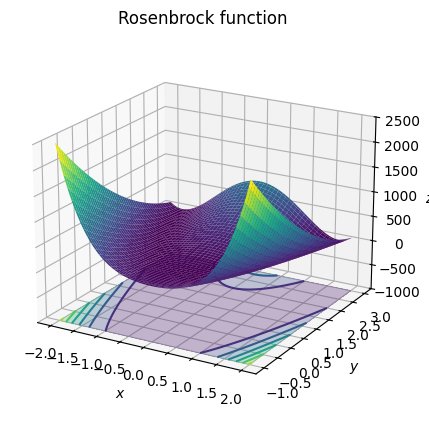

In [69]:
cmap = 'viridis'

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cmap)
ax.contourf(X, Y, Z, zdir='z', offset=-1000, cmap=cmap, alpha=0.3)
ax.contour(X, Y, Z, zdir='z', offset=-1000, cmap=cmap)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Rosenbrock function')
ax.set_zlim(-1000, 2500)
ax.view_init(20, -60)
plt.show()

**Exercise** Find a local minima of the rosenbrock function starting from:

- $\bm{x}_{0} = (0.1, 0.0)$
- $\bm{x}_{0} = (1.0, 4.0)$

In [70]:
def rosenbrock_grad(x, y):
    dfdx = -2 * (1 - x) - 400 * x * (y - x**2)
    dfdy = 200 * (y - x**2)
    return dfdx, dfdy

In [88]:
def find_rosenbrock_minimum(x_0):
    eta = 1e-3
    tol = 1e-3
    return gradient_descent(
        lambda x: rosenbrock(x[0], x[1]),
        lambda x: rosenbrock_grad(x[0], x[1]),
        x_0,
        eta,
        tol,
    )

In [89]:
x_0 = np.array([0.1, 0.0])
x_min, all_x = find_rosenbrock_minimum(x_0)
print(x_min)

Initial guess: [0.1 0. ]
Current guess: [0.1014 0.002 ]
Current guess: [0.10286128 0.00365639]
Current guess: [0.10437067 0.0050412 ]
Current guess: [0.10591762 0.00621161]
Current guess: [0.10749366 0.007213  ]
Current guess: [0.10909198 0.00808137]
Current guess: [0.11070712 0.00884531]
Current guess: [0.11233466 0.00952746]
Current guess: [0.11397108 0.01014579]
Current guess: [0.1156135  0.01071451]
Current guess: [0.11725963 0.0112449 ]
Current guess: [0.11890762 0.01174589]
Current guess: [0.12055598 0.01222451]
Current guess: [0.12220351 0.01268636]
Current guess: [0.12384925 0.01313583]
Current guess: [0.12549243 0.01357639]
Current guess: [0.12713242 0.01401078]
Current guess: [0.12876872 0.01444116]
Current guess: [0.13040095 0.0148692 ]
Current guess: [0.13202877 0.01529624]
Current guess: [0.13365194 0.01572331]
Current guess: [0.13527026 0.01615122]
Current guess: [0.13688356 0.01658058]
Current guess: [0.13849171 0.01701189]
Current guess: [0.14009463 0.0174455 ]
Current 

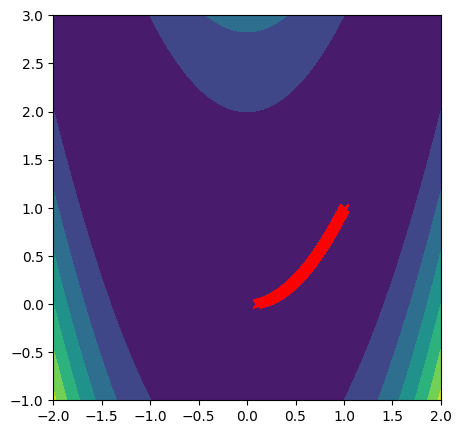

In [90]:
all_x = np.array(all_x)
plt.figure(figsize=(5, 5))
plt.contourf(X, Y, Z, cmap=cmap)
plt.plot(all_x[:, 0], all_x[:, 1], 'rx')
plt.show()

In [92]:
x_0 = np.array([1.0, 4.0])
x_min, all_x = find_rosenbrock_minimum(x_0)
print(x_min)

Initial guess: [1. 4.]
Current guess: [2.2 3.4]
Current guess: [0.9304 3.688 ]
Current guess: [1.98090715 3.12352883]
Current guess: [1.34468715 3.28362169]
Current guess: [2.13759887 2.98853406]
Current guess: [0.78368154 3.30469303]
Current guess: [1.62752363 2.76658578]
Current guess: [1.70292665 2.74303525]
Current guess: [1.59462882 2.77442004]
Current guess: [1.74115256 2.72810425]
Current guess: [1.52828878 2.78880584]
Current guess: [1.80424326 2.69817799]
Current guess: [1.40056584 2.80960114]
Current guess: [1.87484587 2.63999785]
Current guess: [1.21686325 2.81500768]
Current guess: [1.86587018 2.54815738]
Current guess: [1.16756123 2.7348202 ]
Current guess: [1.8078067  2.46049601]
Current guess: [1.22214728 2.62202982]
Current guess: [1.77332446 2.39635265]
Current guess: [1.24096718 2.54601805]
Current guess: [1.73985963 2.34481435]
Current guess: [1.26353939 2.48127378]
Current guess: [1.71017485 2.30432538]
Current guess: [1.28437622 2.42839991]
Current guess: [1.683904

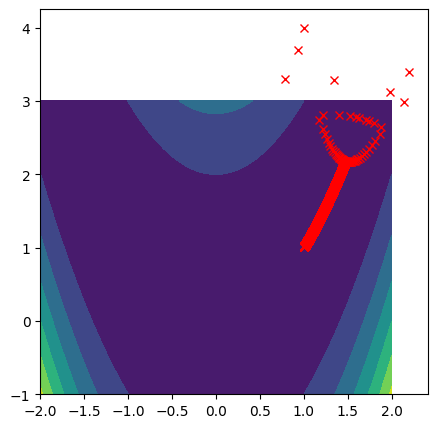

In [93]:
all_x = np.array(all_x)
plt.figure(figsize=(5, 5))
plt.contourf(X, Y, Z, cmap=cmap)
plt.plot(all_x[:, 0], all_x[:, 1], 'rx')
plt.show()